In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
def p2f(x):
    try:
        y = 0.01*float(x.replace(',','.').strip('%'))
    except:
        y = np.nan
    return y
market_rate = pd.read_csv('market_rate.csv', 
                          sep=';', 
                          encoding='utf-8', 
                          decimal=',',
                          index_col=0, 
                          parse_dates=[0],
                          date_parser=lambda x: datetime.date(int(x),12,31),
                          converters={1:p2f, 2:p2f, 3:p2f, 4:p2f},
                          header=0,
                          names=['Date','Taux brut Afer', 'Taux net Afer',
                            'Taux moyen du marché', 'Inflation'])
market_rate.tail()

,Taux brut Afer,Taux net Afer,Taux moyen du marché,Inflation
Date,,,,
1981-12-31,0.1401,0.1347,0.1176,0.134
1980-12-31,0.1308,0.1254,0.1095,0.136
1979-12-31,0.1148,0.1095,0.0956,0.108
1978-12-31,0.1108,0.1055,0.0921,0.091
1977-12-31,0.1031,0.0978,0.0854,0.094


In [3]:
tec10_rate = pd.read_csv('tec10_rate.csv', 
                         sep=';', 
                         decimal=',',
                         encoding='utf-8',
                         index_col=0,
                         parse_dates=[0],
                         usecols=[0,1],
                         date_parser=lambda x: datetime.datetime.strptime(x, '%d/%m/%Y'),
                         header=0,
                         names=['Date', 'TEC10'])
tec10_rate['TEC10'] = 0.01*tec10_rate['TEC10']
tec10_rate.tail()

,TEC10
Date,
1986-06-01,0.08112
1986-05-01,0.08142
1986-04-01,0.07983
1986-03-01,0.08509
1986-02-01,0.09363


In [4]:
yearly_tec10_rate = tec10_rate.resample('Y').mean()

In [5]:
oecd_data = pd.read_csv('DP_LIVE_29112019144908688.csv', 
                         sep=',', 
                         decimal='.',
                         encoding='utf-8',
                         index_col=0,
                         parse_dates=[0],
                         usecols=[5,6],
                         date_parser=lambda x: datetime.datetime.strptime(x, '%Y-%m'),
                         header=0,
                         names=['Date','OECD LT rate'])
oecd_data['OECD LT rate'] = 0.01*oecd_data['OECD LT rate']
oecd_data.tail()

,OECD LT rate
Date,
2019-05-01,0.0030
2019-06-01,0.0008
2019-07-01,-0.0007
2019-08-01,-0.0034
2019-09-01,-0.0028


In [6]:
yearly_oecd_rate = oecd_data.resample('Y').mean()

In [7]:
cardif = pd.read_csv('Taux par compagnie.csv', 
                         sep=',', 
                         decimal='.',
                         encoding='utf-8',
                         index_col=0,
                         parse_dates=[0],                         
                         date_parser=lambda x: datetime.datetime.strptime(x,'%d/%m/%Y'),
                         header=0)

In [8]:
df = market_rate.merge(yearly_tec10_rate, left_index=True, right_index=True, how='outer')\
.merge(yearly_oecd_rate, left_index=True, right_index=True, how='outer')\
.merge(cardif, left_index=True, right_index=True, how='outer')

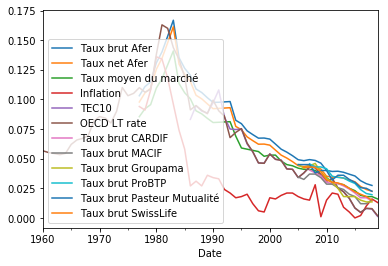

In [9]:
df.plot()

In [10]:
def myplot(x, y, data):
    d = data[:'31/12/2018'][[x,y]].dropna()
    regr = linear_model.LinearRegression()
    X = d[x].values.reshape(-1,1)
    Y = d[y].values.reshape(-1,1)
    regr.fit(X, Y)
    r2 = regr.score(X,Y)    
    a = regr.coef_[0][0]
    b = regr.intercept_[0]
    g = sns.regplot(x=x, y=y, data=d)
    props = dict(boxstyle='round', alpha=0.15,color=sns.color_palette()[0])
    textstr = '$y = {:.4f} + {:.4f}x \ (R^2 = {:.3f})$'.format(b, a, r2)
    g.text(0.0, 0.9, textstr, transform=g.transAxes, fontsize=14, bbox=props)

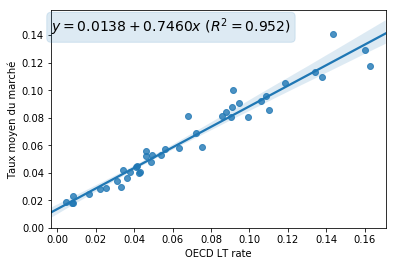

In [11]:
myplot(x="OECD LT rate", y='Taux moyen du marché', data=df)

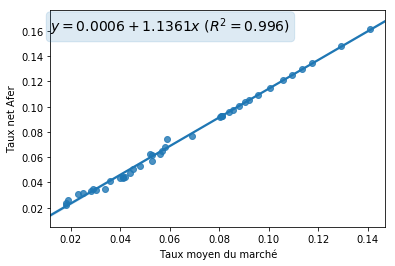

In [12]:
myplot(x="Taux moyen du marché", y="Taux net Afer", data=df)

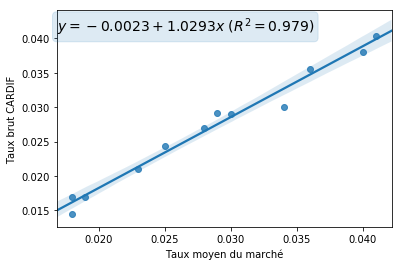

In [13]:
myplot(x="Taux moyen du marché", y="Taux brut CARDIF", data=df)

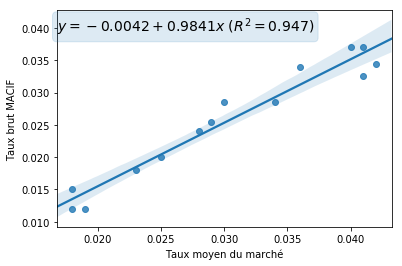

In [14]:
myplot(x="Taux moyen du marché", y="Taux brut MACIF", data=df)

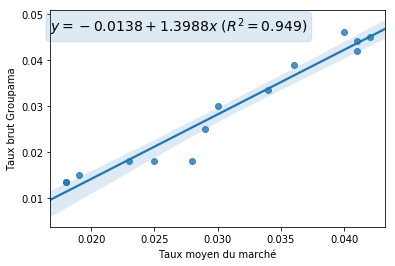

In [15]:
myplot(x="Taux moyen du marché", y="Taux brut Groupama", data=df)

In [16]:
df['Predicted market rate'] = 0.0138+0.7460*df["OECD LT rate"]

In [17]:
df.tail()

,Taux brut Afer,Taux net Afer,Taux moyen du marché,Inflation,TEC10,OECD LT rate,Taux brut CARDIF,Taux brut MACIF,Taux brut Groupama,Taux brut ProBTP,Taux brut Pasteur Mutualité,Taux brut SwissLife,Predicted market rate
Date,,,,,,,,,,,,,
2015-12-31,0.0354,0.0305,0.023,0.000,0.008250,0.008419,0.0210,0.018,0.0180,0.0291,0.0300,0.022,0.020080
2016-12-31,0.0314,0.0265,0.019,0.002,0.004654,0.004679,0.0170,0.012,0.0150,0.0239,0.0255,0.020,0.017290
2017-12-31,0.0289,0.0240,0.018,0.010,0.007969,0.008105,0.0170,0.012,0.0135,0.0206,0.0250,0.018,0.019846
2018-12-31,0.0274,0.0225,0.018,0.016,0.007505,0.007842,0.0145,0.015,0.0135,0.0196,0.0225,0.015,0.019650
2019-12-31,NaN,NaN,0.016,0.013,0.001250,0.001889,NaN,NaN,NaN,NaN,NaN,NaN,0.015209


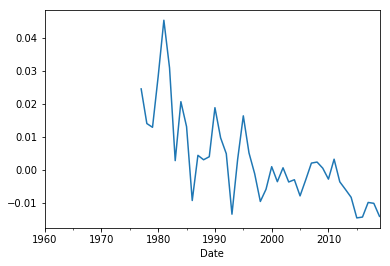

In [18]:
(df['OECD LT rate']-df['Taux moyen du marché']).plot()

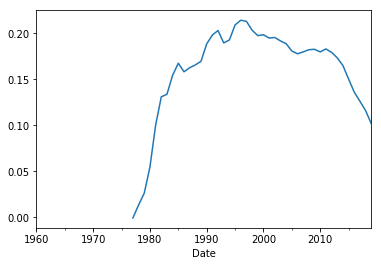

In [19]:
(-0.025+(df['OECD LT rate']-df['Taux moyen du marché']).cumsum()).plot()

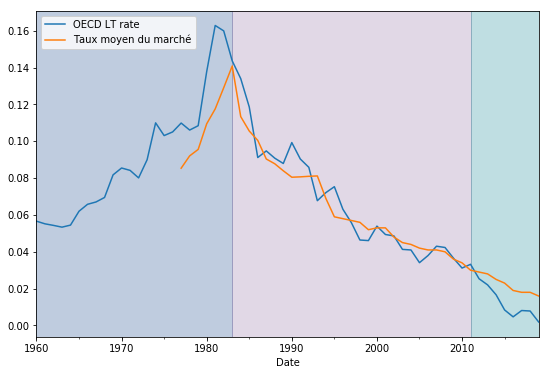

In [87]:
df[['OECD LT rate', 'Taux moyen du marché']].plot(figsize=(9,6))
plt.axvspan('31-12-1960', '31-12-1983', color='#003781', alpha=0.25)
plt.axvspan('31-12-1983', '31-12-2011', color='#8A679C', alpha=0.25)
plt.axvspan('31-12-2011', '31-12-2019', color='#007D8C', alpha=0.25)

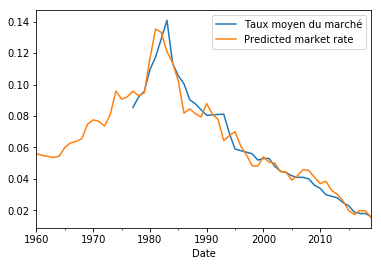

In [21]:
df[['Taux moyen du marché', 'Predicted market rate']].plot()

In [22]:
df.head()

,Taux brut Afer,Taux net Afer,Taux moyen du marché,Inflation,TEC10,OECD LT rate,Taux brut CARDIF,Taux brut MACIF,Taux brut Groupama,Taux brut ProBTP,Taux brut Pasteur Mutualité,Taux brut SwissLife,Predicted market rate
Date,,,,,,,,,,,,,
1960-12-31,NaN,NaN,NaN,NaN,NaN,0.056633,NaN,NaN,NaN,NaN,NaN,NaN,0.056048
1961-12-31,NaN,NaN,NaN,NaN,NaN,0.055192,NaN,NaN,NaN,NaN,NaN,NaN,0.054973
1962-12-31,NaN,NaN,NaN,NaN,NaN,0.054342,NaN,NaN,NaN,NaN,NaN,NaN,0.054339
1963-12-31,NaN,NaN,NaN,NaN,NaN,0.053383,NaN,NaN,NaN,NaN,NaN,NaN,0.053624
1964-12-31,NaN,NaN,NaN,NaN,NaN,0.054492,NaN,NaN,NaN,NaN,NaN,NaN,0.054451


In [23]:
df.tail()

,Taux brut Afer,Taux net Afer,Taux moyen du marché,Inflation,TEC10,OECD LT rate,Taux brut CARDIF,Taux brut MACIF,Taux brut Groupama,Taux brut ProBTP,Taux brut Pasteur Mutualité,Taux brut SwissLife,Predicted market rate
Date,,,,,,,,,,,,,
2015-12-31,0.0354,0.0305,0.023,0.000,0.008250,0.008419,0.0210,0.018,0.0180,0.0291,0.0300,0.022,0.020080
2016-12-31,0.0314,0.0265,0.019,0.002,0.004654,0.004679,0.0170,0.012,0.0150,0.0239,0.0255,0.020,0.017290
2017-12-31,0.0289,0.0240,0.018,0.010,0.007969,0.008105,0.0170,0.012,0.0135,0.0206,0.0250,0.018,0.019846
2018-12-31,0.0274,0.0225,0.018,0.016,0.007505,0.007842,0.0145,0.015,0.0135,0.0196,0.0225,0.015,0.019650
2019-12-31,NaN,NaN,0.016,0.013,0.001250,0.001889,NaN,NaN,NaN,NaN,NaN,NaN,0.015209


In [24]:
df.describe()

,Taux brut Afer,Taux net Afer,Taux moyen du marché,Inflation,TEC10,OECD LT rate,Taux brut CARDIF,Taux brut MACIF,Taux brut Groupama,Taux brut ProBTP,Taux brut Pasteur Mutualité,Taux brut SwissLife,Predicted market rate
count,42.000000,42.000000,43.000000,43.000000,34.000000,60.000000,12.000000,14.000000,14.000000,12.000000,14.000000,13.000000,60.000000
mean,0.078629,0.073502,0.063007,0.034953,0.049064,0.068575,0.026917,0.025607,0.028607,0.033375,0.035179,0.029746,0.064957
std,0.037548,0.037366,0.033254,0.037146,0.029564,0.038321,0.008479,0.008979,0.012751,0.008899,0.007582,0.009706,0.028587
min,0.027400,0.022500,0.016000,0.000000,0.001250,0.001889,0.014500,0.012000,0.013500,0.019600,0.022500,0.015000,0.015209
25%,0.048350,0.043375,0.038000,0.015000,0.031505,0.042085,0.020000,0.018500,0.018000,0.027800,0.030500,0.022000,0.045195
50%,0.068850,0.063750,0.056000,0.020000,0.044601,0.064456,0.028000,0.027000,0.027500,0.033950,0.036000,0.029500,0.061885
75%,0.105125,0.099825,0.086600,0.033500,0.074897,0.090928,0.031400,0.033625,0.041250,0.041875,0.040000,0.039000,0.081632
max,0.166800,0.161300,0.140900,0.136000,0.108000,0.162917,0.040400,0.037000,0.046000,0.045600,0.045000,0.043000,0.135336


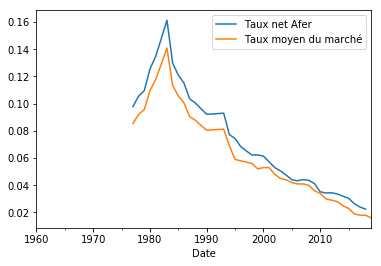

In [25]:
df[["Taux net Afer", "Taux moyen du marché"]].plot()

In [26]:
df['01/01/1990':'31/12/2019']

,Taux brut Afer,Taux net Afer,Taux moyen du marché,Inflation,TEC10,OECD LT rate,Taux brut CARDIF,Taux brut MACIF,Taux brut Groupama,Taux brut ProBTP,Taux brut Pasteur Mutualité,Taux brut SwissLife,Predicted market rate
Date,,,,,,,,,,,,,
1990-12-31,0.0975,0.0922,0.0805,0.034,0.097210,0.099321,NaN,NaN,NaN,NaN,NaN,NaN,0.087894
1991-12-31,0.0976,0.0924,0.0807,0.033,0.108000,0.090383,NaN,NaN,NaN,NaN,NaN,NaN,0.081226
1992-12-31,0.0979,0.0927,0.0810,0.024,0.085000,0.085879,NaN,NaN,NaN,NaN,NaN,NaN,0.077866
1993-12-31,0.0982,0.0930,0.0812,0.021,0.075000,0.067750,NaN,NaN,NaN,NaN,NaN,NaN,0.064341
1994-12-31,0.0824,0.0772,0.0690,0.017,0.074586,0.072138,NaN,NaN,NaN,NaN,NaN,NaN,0.067615
1995-12-31,0.0795,0.0744,0.0590,0.018,0.075063,0.075350,NaN,NaN,NaN,NaN,NaN,NaN,0.070011
1996-12-31,0.0735,0.0684,0.0580,0.020,0.062417,0.063121,NaN,NaN,NaN,NaN,NaN,NaN,0.060888
1997-12-31,0.0703,0.0652,0.0570,0.012,0.055758,0.055825,NaN,NaN,NaN,NaN,NaN,NaN,0.055446
1998-12-31,0.0673,0.0622,0.0560,0.006,0.046392,0.046402,NaN,NaN,NaN,NaN,NaN,NaN,0.048416


In [27]:
companies = ["Afer", "CARDIF", "MACIF", "ProBTP", "Pasteur Mutualité", "SwissLife"]
for l in companies:
    df["Delta " + l] = df["Taux brut " + l] - df["Taux moyen du marché"]
df2 = df[["Taux moyen du marché"] + ["Delta " + l for l in companies]].dropna(how="all")

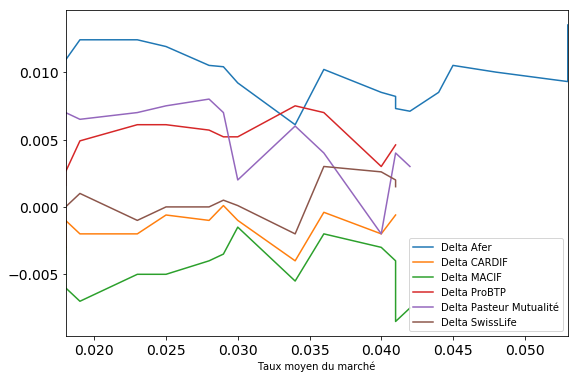

In [28]:
df2['01/01/2000':'31/12/2018'].set_index('Taux moyen du marché').plot(figsize=(9,6), fontsize=14)

In [32]:
import fbprophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [67]:
data = df[["Taux moyen du marché"]]['01/01/1900':'31/12/2018']
data.reset_index(level=0, inplace=True)
data = data.rename(columns={'Date': 'ds', 'Taux moyen du marché': 'y'}).dropna()

In [99]:
data_prophet = fbprophet.Prophet(changepoint_prior_scale=0.25)
data_prophet.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [100]:
# Make a future dataframe for 2 years
data_forecast = data_prophet.make_future_dataframe(periods=10, freq='Y')# Make predictions
data_forecast = data_prophet.predict(data_forecast)

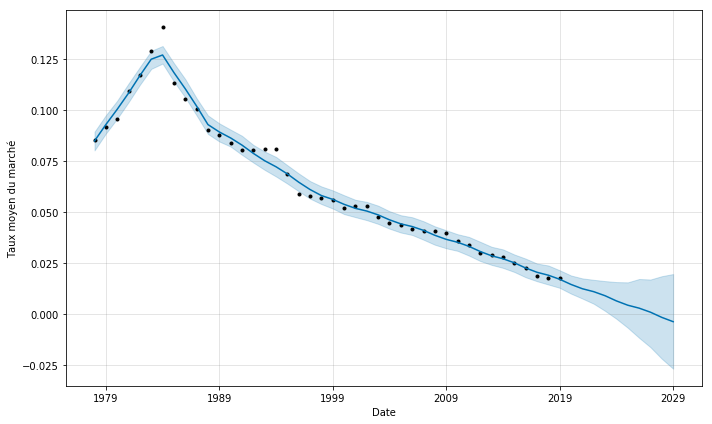

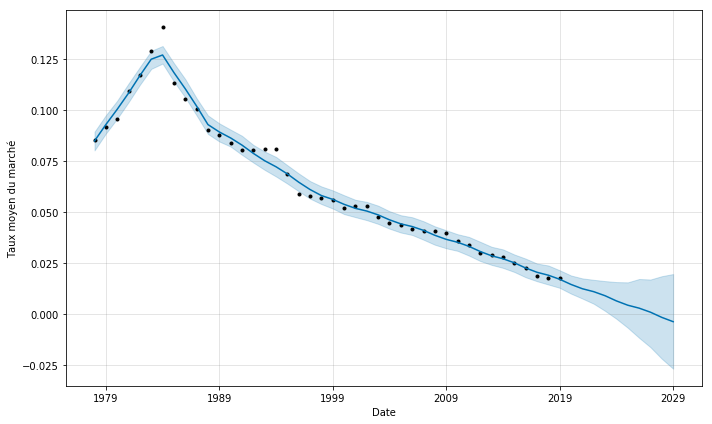

In [101]:
pd.plotting.register_matplotlib_converters()
data_prophet.plot(data_forecast, xlabel = 'Date', ylabel = 'Taux moyen du marché')

In [102]:
data_forecast[data_forecast['ds']=='31/12/2019'][['yhat']]

,yhat
42,0.014716


In [76]:
data

,ds,y
17,1977-12-31,0.0854
18,1978-12-31,0.0921
19,1979-12-31,0.0956
20,1980-12-31,0.1095
21,1981-12-31,0.1176
22,1982-12-31,0.1291
23,1983-12-31,0.1409
24,1984-12-31,0.1134
25,1985-12-31,0.1056
26,1986-12-31,0.1005
